<a href="https://colab.research.google.com/github/tianlangxingaerfa/Python/blob/main/Lab3_capacitor_scale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run the following code to make some functions that we need.


In [16]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
import math

def mycurvefit(func,XX,YY,XX_UNCERT,YY_UNCERT,xlabel=None,ylabel=None,p0=None):
    '''
    Fits data (XX, YY, UNCERT) to function using scipy.curvefit, and then plots data and best fit
        Parameters
    ----------
    func : user-defined function
            Model to be used to fit data
    XX : numpy array
            1D vector of data's independent variable
    YY : numpy array
            1D vector of data's dependent variable
    XX_UNCERT : numpy array
            1D vector of uncertainty in XX
    YY_UNCERT : numpy array
            1D vector of uncertainty in YY
    xlabel: string
            label for plot's x-axis
    ylabel : string
            label for plot's y-axis
    '''

    def chisquare(data,model,uncertainty):
        x2 = np.sum((data-model)**2/uncertainty**2)
        return x2
        '''
        Calculates value of chi squared for model given data and unvertainty

        Parameters
        ----------
        data : numpy array
                1D vector of data values
        model : numpy array
                1D vector of values predicted by model
        uncertainty : numpy array
                1D vector of uncertainty corresponding to data
        '''

    ##################################################
    #                Do the curve fit                #
    ##################################################

    # To get curve_fit to use UNCERT, set absolute_sigma = True.  Otherwise sigma = 1
    fitparams,pcov = curve_fit(func,XX,YY,sigma=YY_UNCERT,absolute_sigma=True, p0=p0)

    # Find error in each parameter.  Assumes covariance matrix is roughly diagonal.
    fiterrs = np.sqrt(np.diag(pcov))

    ##################################################
    #                Begin Plotting                  #
    ##################################################

    fig,ax = plt.subplots()
    # plot the raw data
    plt.errorbar(XX,YY,xerr=XX_UNCERT,yerr=YY_UNCERT,fmt='.',label='data')

    # plot the fit
    XX_shade = np.linspace(min(XX),max(XX),100)
    plt.plot(XX_shade,func(XX_shade,*fitparams),'k-',label = 'best fit')

    if xlabel == None:
      xlabel = ''
    if ylabel == None:
      ylabel = ''

    # make the plot nice
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    ##################################################
    #           Plot the chisqred contours           #
    ##################################################

    # define the minimum chi square value readily
    chisqmin = chisquare(YY,func(XX,*fitparams),YY_UNCERT)
    A_best = fitparams[0]
    B_best = fitparams[1]
    sigma_A = np.sqrt(pcov[1][1])
    sigma_B = np.sqrt(pcov[0][0])
    rho = pcov[0][1]/(sigma_A*sigma_B)

    # define chi-squared plot interval
    A_interval = np.sqrt(6.17 * sigma_A**2/(1 - rho**2))
    B_interval = np.sqrt(6.17 * sigma_B**2/(1 - rho**2))
    AB_interval = [A_best-1.1*A_interval, A_best+1.1*A_interval, B_best-1.1*B_interval, B_best+1.1*B_interval]

    # Contour plot
    fig, ax = plt.subplots()
    def paraboloid(A, B):
        return (A - A_best)**2/sigma_A**2 + (B - B_best)**2/sigma_B**2 + 2 * rho * (A - A_best) * (B - B_best)/(sigma_A * sigma_B)
    X, Y = np.meshgrid(np.linspace(AB_interval[0], AB_interval[1], 200), np.linspace(AB_interval[2], AB_interval[3], 200))
    Z = paraboloid(X, Y)
    CS1 = plt.contour(X, Y, Z, levels=[2.3, 3.17])

    plt.plot(A_best, B_best, 'o', markersize=4, color='k',label='Best estimate')
    plt.xlabel('P1')
    plt.ylabel('P2')

    fmt = {}
    strs = [r'1 $\sigma$', r'2 $\sigma$']
    for l, s in zip(CS1.levels, strs):
        fmt[l] = s

    # Label every other level using strings
    ax.clabel(CS1, CS1.levels[::1], inline=True, fmt=fmt, fontsize=10)
    plt.legend()
    plt.tight_layout()


    ##################################################
    #    Calculate and display the fit metrics       #
    ##################################################

    # calculate the number of degrees of freedom
    shape = np.shape(XX)
    dof = shape[0] - len(fitparams)

    # print out the parameters and errors on them
    print('Best Fit Parameters:\n')
    i = 0
    for A,sigA in zip(fitparams, fiterrs):
        i = i + 1
        mystring = '\t P' + str(i) + ' = '
        print(mystring,round(A,4),'+/-',round(sigA,4))

    print('\n Fit Metrics:\n')
    print('\t Degrees of freedom: ', dof)

    X2 = chisquare(YY,func(XX,*fitparams),YY_UNCERT)
    X2string = '\t Chi Squared = ' + str(round(X2,2))
    X2redstring = '\t Reduced Chi Squared = '+ str(round(X2/dof,2))
    print(X2string)
    print(X2redstring)

    return fitparams,fiterrs

def line(x,m,b):
    y = m*x + b
    return y

def sqrt(x,m,b):
    y = m*(x**(0.5)) + b
    return y

def unc_prop(mass, slope, delta_y, delta_intercept, delta_slope):
    return np.sqrt(delta_y**2 + delta_intercept**2 + (mass*delta_slope)**2)/slope

def CT(A,delta_A,B,delta_B):
  return np.abs(A-B)/np.sqrt(delta_A**2 + delta_B**2)

---
# Now enter your data for the mass and capacitance measurements you made



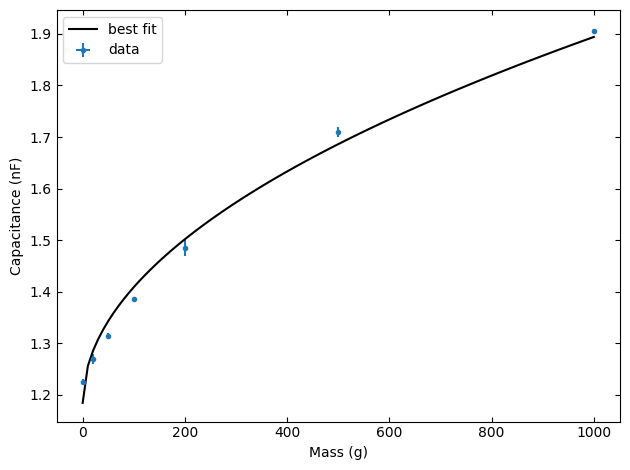

Best Fit Parameters:

	 P1 =  0.0224 +/- 0.0002
	 P2 =  1.1844 +/- 0.0034

 Fit Metrics:

	 Degrees of freedom:  5
	 Chi Squared = 134.05
	 Reduced Chi Squared = 26.81


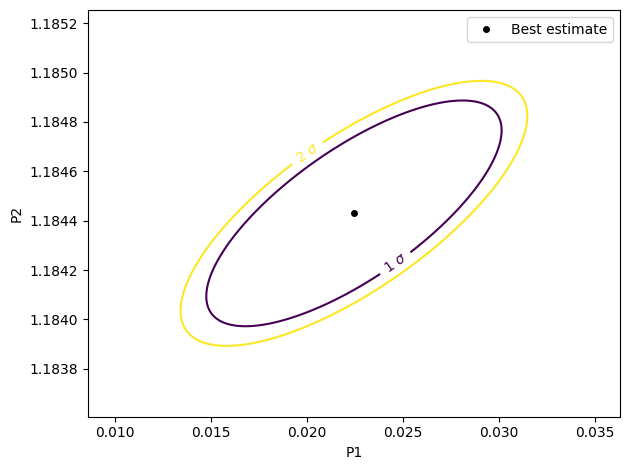

In [17]:
# Enter masses in grams
m = np.array([0,1000,500,200,100,50,20])
delta_m = np.array([1,1,1,1,1,1,1])

# Enter repeated capacitance measurements for each mass (in nF)
c1 = np.array([1.23,1.22])
c2 = np.array([1.90,1.91])
c3 = np.array([1.70,1.72])
c4 = np.array([1.47,1.50])
c5 = np.array([1.38,1.39])
c6 = np.array([1.31,1.32])
c7 = np.array([1.26,1.28])

# Calculate the mean and std. err. of each mass ( you may need to expand or condense the following functions)
c = np.array([c1.mean(), c2.mean(), c3.mean(), c4.mean(), c5.mean(), c6.mean(), c7.mean()])
delta_c = np.array([c1.std(ddof=1)/np.sqrt(len(c1)), c2.std(ddof=1)/np.sqrt(len(c2)), c3.std(ddof=1)/np.sqrt(len(c3)), c4.std(ddof=1)/np.sqrt(len(c4)), c5.std(ddof=1)/np.sqrt(len(c5)), c6.std(ddof=1)/np.sqrt(len(c6)), c7.std(ddof=1)/np.sqrt(len(c7))])

fitparams, fiterrors = mycurvefit(sqrt, m, c, delta_m, delta_c, xlabel='Mass (g)', ylabel='Capacitance (nF)')

# Now enter the capacitance measurement for your phone to get an estimate of the mass

In [18]:
##### CHANGE THESE TWO VALUES
c_phone = 1.49 # Capacitance of phone in nF
unc_c_phone = 0.01

# fitparams[0] pm fiterrors[0] = slope
# fitparams[1] pm fiterrors[1] = y-intercept
m_phone_calc = ((c_phone - fitparams[1])/fitparams[0])**2
unc_m_phone_calc = unc_prop(m_phone_calc, fitparams[0], unc_c_phone, fiterrors[1], fiterrors[0])

print(r'mass of phone =', m_phone_calc.round(2), '+/-', unc_m_phone_calc.round(2), ' grams')

mass of phone = 185.43 +/- 1.75  grams


# Finally, we want to test how close this is to the phone's actual mass

In [21]:
##### CHANGE THESE TWO VALUES
m_phone_meas = 218.66 # in g
unc_m_phone_meas = 0.01 # Uncertainty in g

print('Comparison Test =', CT(m_phone_meas, unc_m_phone_meas, m_phone_calc, unc_m_phone_calc).round(2))

Comparison Test = 18.95
